# Load data

In [2]:
import os
import pandas as pd

# Constants
DIR_PATH = '../Consolidated_Features'
SUBJECT_LIST = [
    "3128", "3129", "3130", "3131", "3132", "3133", "3136", "3137", "3138", "3139", 
    "3140", "3141", "3142", "3143", "3147", "3148", "3149", "3150", "3151", "3152", 
    "3153", "3154", "3155", "3156", "3158", "3159", "3160", "3162", "6037", "6038", 
    "6043", "6044", "6045", "6046", "6047", "6048", "6049"
]
NUM_STIMULI = 5
STIMULUS_TYPES = ['Rest', 'Reading', 'SpeechPrep', 'Speech', 'Recovery']
NUM_FEATURES = 5
FEATURE_TYPES = ['HR', 'PAT', 'PEP', 'PPGamp', 'PTTrecip']

# List to store dataframes for MI subjects
dataframes_mi = []

# List to store dataframes for healthy control subjects
dataframes_ht = []

# List to store dataframes for all subjects
dataframes_all = []

# Variables to track index of MI, healthy control, and all subjects
sub_mi = -1
sub_ht = -1
sub_all = -1

# Loop through all subjects
for sub in os.listdir(DIR_PATH):
    subject_id = int(sub[3:])  # Extract subject ID from directory name

    if str(subject_id) in SUBJECT_LIST:

        # Check if the subject ID belongs to MI subjects
        if str(subject_id).startswith('3'):
            sub_mi += 1
            dataframes_mi.append([])

            # Loop through stimuli
            for stim in range(NUM_STIMULI):
                dataframes_mi[sub_mi].append([])

                # Loop through features
                for feat in range(NUM_FEATURES):
                    dataframes_mi[sub_mi][stim].append([])
                    feat_load = os.path.join(DIR_PATH, 'sub' + str(subject_id), 'stim' + str(stim) + '_' + FEATURE_TYPES[feat] + '.csv')
                    data = pd.read_csv(feat_load)
                    dataframes_mi[sub_mi][stim][feat] = data.values
        
        # Check if the subject ID belongs to healthy control subjects
        elif str(subject_id).startswith('6'):
            sub_ht += 1
            dataframes_ht.append([])

            # Loop through stimuli
            for stim in range(NUM_STIMULI):
                dataframes_ht[sub_ht].append([])

                # Loop through features
                for feat in range(NUM_FEATURES):
                    dataframes_ht[sub_ht][stim].append([])
                    feat_load = os.path.join(DIR_PATH, 'sub' + str(subject_id), 'stim' + str(stim) + '_' + FEATURE_TYPES[feat] + '.csv')
                    data = pd.read_csv(feat_load)
                    dataframes_ht[sub_ht][stim][feat] = data.values
        
        # For all subjects
        sub_all += 1
        dataframes_all.append([])

        # Loop through stimuli
        for stim in range(NUM_STIMULI):
            dataframes_all[sub_all].append([])

            # Loop through features
            for feat in range(NUM_FEATURES):
                dataframes_all[sub_all][stim].append([])
                feat_load = os.path.join(DIR_PATH, 'sub' + str(subject_id), 'stim' + str(stim) + '_' + FEATURE_TYPES[feat] + '.csv')
                data = pd.read_csv(feat_load)
                dataframes_all[sub_all][stim][feat] = data.values

print("Data loading completed.")

Data loading completed.


## Get unhealthy vs. healthy labels

In [3]:
# Determine MI (Myocardial Infarction) vs. HT (Healthy Control) status based on subject identifier
mi_subjects = ["3128", "3129", "3130", "3131", "3132", "3133", "3136", "3137", "3138", "3139", 
               "3140", "3141", "3142", "3143", "3147", "3148", "3149", "3150", "3151", "3152", 
               "3153", "3154", "3155", "3156", "3158", "3159", "3160", "3162"]

# Healthy Control subjects
ht_subjects = ["6037", "6038", "6043", "6044", "6045", "6046", "6047", "6048", "6049"]

# Initialization of lists to store health condition labels
health_condition_labels = []

# Modify the loop to assign labels based on health condition
for subj_index, subj_id in enumerate(SUBJECT_LIST):

    if subj_id in mi_subjects:
        health_condition = 0  # Myocardial Infarction

    elif subj_id in ht_subjects:
        health_condition = 1  # Healthy Control
        
    else:
        health_condition = "Unknown"
    
    # Create labels based on health condition for all stimuli and features
    subj_labels = []

    for _ in range(NUM_STIMULI):
        stim_labels = []

        for _ in range(NUM_FEATURES):
            stim_labels.append(health_condition)

        subj_labels.append(stim_labels)
        
    health_condition_labels.append(subj_labels)

# Now, health_condition_labels contains labels for each subject, stimulus, and feature based on health condition

# Normalize to baseline

In [4]:
# %% Baseline correction (normalization)

import numpy as np

# Initialize lists to store mean difference, normalized data, and labels
mean_difference_all = []  # Stores the mean difference between feature and baseline for all subjects, stimuli, and features
normalized_data_all = []  # Stores the normalized data for all subjects, stimuli, and features
labels_all = []  # Stores the labels for all subjects, stimuli, and features

# Number of data points and half of it
num_data_points = 80  # Total number of data points
data_points_half = round(num_data_points / 2)  # Half of the total number of data points

# Loop through each subject
for subject_index, subject_id in enumerate(SUBJECT_LIST):
    normalized_data_subject = []  # Stores the normalized data for the current subject
    labels_subject = []  # Stores the labels for the current subject

    # Loop through each stimulus
    for stimulus_index in range(NUM_STIMULI):
        normalized_data_stimulus = []  # Stores the normalized data for the current stimulus
        labels_stimulus = []  # Stores the labels for the current stimulus

        # Loop through each feature
        for feature_index in range(NUM_FEATURES):
            baseline_data = dataframes_all[subject_index][0][feature_index][:, 1]  # Baseline data
            baseline_midpoint = baseline_data[len(baseline_data) // 2 - data_points_half:len(baseline_data) // 2 + data_points_half]  # Midpoint of baseline data
            feature_data = dataframes_all[subject_index][stimulus_index][feature_index][:, 1]  # Feature data
            feature_midpoint = feature_data[len(feature_data) // 2 - data_points_half:len(feature_data) // 2 + data_points_half]  # Midpoint of feature data

            # Calculate mean difference between feature and baseline
            mean_difference = (np.mean(feature_midpoint) - np.mean(baseline_midpoint)) / np.mean(baseline_midpoint)
            mean_difference_all.append(mean_difference)

            # Normalize the data and assign labels
            if stimulus_index == 0:
                # Baseline data
                normalized_data = (baseline_midpoint - np.mean(baseline_midpoint)) / np.mean(baseline_midpoint)
                labels = np.zeros_like(normalized_data)  # Assign label 0

            else:
                # Feature data
                normalized_data = (feature_midpoint - np.mean(baseline_midpoint)) / np.mean(baseline_midpoint)
                labels = np.ones_like(normalized_data)  # Assign label 1

            normalized_data_stimulus.append(normalized_data)
            labels_stimulus.append(labels)

        normalized_data_subject.append(normalized_data_stimulus)
        labels_subject.append(labels_stimulus)

    normalized_data_all.append(normalized_data_subject)
    labels_all.append(labels_subject)

c:\Users\dyzha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dyzha\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:131: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret / rcount


## Get normalized data and labels for SpeechPrep for all features

In [5]:
speech_prep_normalized_all = [subject_data[STIMULUS_TYPES.index('SpeechPrep')] for subject_data in normalized_data_all]
speech_prep_labels_all = [subject_labels[STIMULUS_TYPES.index('SpeechPrep')] for subject_labels in health_condition_labels]

In [6]:
print(speech_prep_normalized_all[0][4])

[-0.29590725 -0.23432916  0.79120646 -0.26154978 -0.23256721 -0.27685996
 -0.20664846 -0.05735781 -0.14445169  0.02355272 -0.20791483 -0.24472829
 -0.30319517 -0.19210061 -0.10172878 -0.24173319 -0.17631923 -0.10005035
 -0.25415563  0.23227604 -0.12363237 -0.26194479 -0.18723549  0.03106238
 -0.0616728  -0.10754111 -0.09316412 -0.18023539 -0.09381698 -0.25121662
  0.69707204 -0.46894726 -0.02349415 -0.1667557  -0.294304   -0.20547098
 -0.25146282 -0.00695033 -0.27949367  0.03463711 -0.19162935 -0.17926633
 -0.28882227  0.09070124 -0.29293056  0.33252426 -0.06158022 -0.27144478
 -0.23731542 -0.02565898 -0.31054077  0.3310088  -0.23950125 -0.2822939
 -0.02195363 -0.22338726  0.78492347 -0.14956874 -0.29236288 -0.08351126
 -0.23574644  0.1843918  -0.12208237 -0.13490612 -0.04912538 -0.07359189
 -0.14817531  0.24448738 -0.20791303 -0.25326048 -0.2046241  -0.1743267
  0.05188645  0.09576723 -0.06546477 -0.10565629 -0.05546834 -0.30825671
  0.56431492 -0.16803683]


In [7]:
# Initialize aggregated data and labels specifically for the "Speech Prep" stimulus
aggregated_data_speech_prep = []  # Stores the aggregated normalized data for all features for "Speech Prep"
aggregated_labels_speech_prep = []  # Stores the aggregated labels for all features for "Speech Prep"

for feature_index in range(NUM_FEATURES):
    aggregated_data_feature = []  # Temporary list to aggregate normalized data for the current feature for "Speech Prep"
    aggregated_labels_feature = []  # Temporary list to aggregate labels for the current feature for "Speech Prep"

    # Loop through each subject
    for subject_index in range(len(SUBJECT_LIST)):
        # Extend the temporary lists with data and labels for the current feature and subject for "Speech Prep"
        aggregated_data_feature.extend(normalized_data_all[subject_index][2][feature_index])  # Assuming index 2 corresponds to "Speech Prep"
        aggregated_labels_feature.extend(labels_all[subject_index][2][feature_index])  # Assuming index 2 corresponds to "Speech Prep"

    # Append the aggregated data and labels for the current feature to the overall lists for "Speech Prep"
    aggregated_data_speech_prep.append(aggregated_data_feature)
    aggregated_labels_speech_prep.append(aggregated_labels_feature)


In [8]:
# Determine the minimum length among all lists in data_all_1
min_length_data = min(len(lst) for lst in aggregated_data_speech_prep)

# Truncate each inner list in data_all_1 to have the minimum length
data_all_1_truncated = [lst[:min_length_data] for lst in aggregated_data_speech_prep]

# Convert the truncated list of lists to a Numpy array
data_all_1_array = np.array(data_all_1_truncated)

# Reshape the Numpy array to have 5 columns
num_columns = 5
data_all_1_array = data_all_1_array.reshape(-1, num_columns)

# Determine the minimum length among all lists in data_y_all_1
min_length_data_y = min(len(lst) for lst in aggregated_labels_speech_prep)

# Truncate each inner list in data_y_all_1 to have the minimum length
data_y_all_1_truncated = [lst[:min_length_data_y] for lst in aggregated_labels_speech_prep]

# Convert the truncated list of lists to a Numpy array
data_y_all_1_array = np.array(data_y_all_1_truncated)

# Reshape the Numpy array to have 5 columns
data_y_all_1_array = data_y_all_1_array.reshape(-1, num_columns)

In [9]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import SparsePCA, KernelPCA
from sklearn.decomposition import PCA

# Extract features and labels
feats = data_all_1_array[:, :]
X = feats
labels = data_y_all_1_array[:, 0]
y = labels

# Perform PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Perform SparsePCA
spca = SparsePCA(n_components=2)
spca.fit(X)
X_spca = spca.transform(X)


Absolute loadings:
[[0.24378313 0.21818189 0.883519   0.24847289 0.224993  ]
 [0.46806228 0.44179589 0.4679955  0.45106142 0.40405185]]
Feature importance:
[('HR', array([0.24378313, 0.21818189, 0.883519  , 0.24847289, 0.224993  ])), ('PAT', array([0.46806228, 0.44179589, 0.4679955 , 0.45106142, 0.40405185]))]


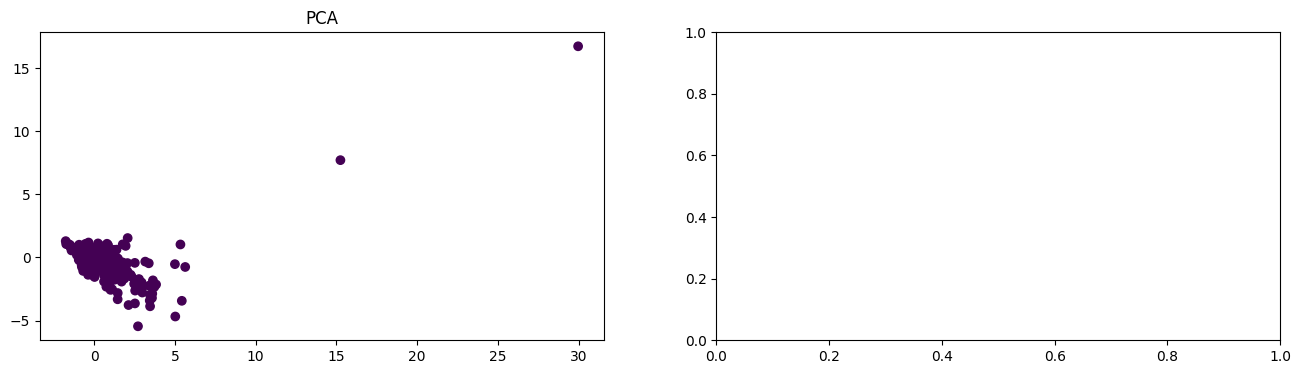

In [21]:
# Plot PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y)
axes[0].set_title('PCA')

# Print and plot Sparse PCA results
'''
#axes[1].scatter(X_spca[:,0], X_spca[:,1],c=y)
#axes[1].set_title('Sparse PCA')
'''

# Get the absolute loadings of the principal components
absolute_loadings = np.abs(pca.components_)
print("Absolute loadings:")
print(absolute_loadings)

# Zip the feature names with the absolute loadings for each principal component

# Assuming FEATURE_TYPES is a list containing the names of your original features
feature_importance = list(zip(FEATURE_TYPES, absolute_loadings))
print("Feature importance:")
print(feature_importance)


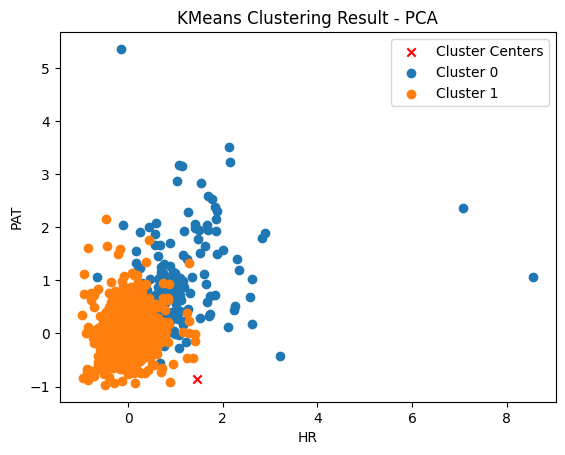

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)  # Assuming you want to divide subjects into 2 clusters (healthy vs. unhealthy)

# Fit KMeans to your data
kmeans.fit(X_pca)

# Get cluster assignments for each subject
cluster_labels = kmeans.labels_

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plotting cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', label='Cluster Centers')

# Plotting data points with labels
for i in range(2):
    cluster_points = data_all_1_array[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

plt.xlabel('HR')
plt.ylabel('PAT')
plt.title('KMeans Clustering Result - PCA')
plt.legend()
plt.show()